# load csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./layer8/processed.csv')

In [3]:
df.keys()

Index(['area_1kh', 'mu_1kh', 'area_2kh', 'mu_2kh', 'T_kh', 'E_kh', 'T_0',
       'E_0', 'threshold_10', 'mu_10', 'std_10', 'max_10', 'min_10',
       'area_thr_10', 'area_10', 'threshold_20', 'mu_20', 'std_20', 'max_20',
       'min_20', 'area_thr_20', 'area_20', 'T_1', 'E_1', 'threshold_11',
       'mu_11', 'std_11', 'max_11', 'min_11', 'area_thr_11', 'area_11',
       'threshold_21', 'mu_21', 'std_21', 'max_21', 'min_21', 'area_thr_21',
       'area_21', 'T_2', 'E_2', 'threshold_12', 'mu_12', 'std_12', 'max_12',
       'min_12', 'area_thr_12', 'area_12', 'threshold_22', 'mu_22', 'std_22',
       'max_22', 'min_22', 'area_thr_22', 'area_22', 'T_3', 'E_3',
       'threshold_13', 'mu_13', 'std_13', 'max_13', 'min_13', 'area_thr_13',
       'area_13', 'threshold_23', 'mu_23', 'std_23', 'max_23', 'min_23',
       'area_thr_23', 'area_23', 'frame', 'time', 'diode', 'x_pos', 'y_pos',
       'max_1', 'max_2', 'centroid_c1_r', 'centroid_c1_c', 'centroid_c2_r',
       'centroid_c2_c'],
      d

(0.0, 40.0)

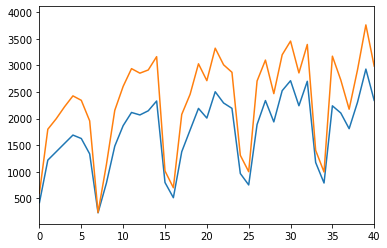

In [4]:
plt.plot(df.mu_10)
plt.plot(df.mu_20)
plt.xlim(0,40)

(array([4.5400e+02, 2.2013e+04, 1.8334e+04, 3.0390e+03, 2.6740e+03,
        1.8770e+03, 7.7200e+02, 1.6600e+02, 2.7000e+01, 4.0000e+00]),
 array([0.60442046, 0.70259881, 0.80077716, 0.89895551, 0.99713386,
        1.0953122 , 1.19349055, 1.2916689 , 1.38984725, 1.4880256 ,
        1.58620395]),
 <BarContainer object of 10 artists>)

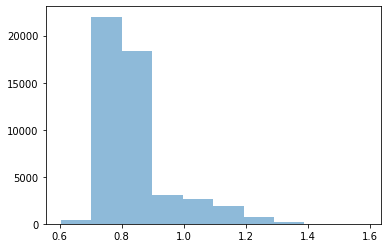

In [5]:
plt.hist(df.mu_10 / df.mu_20, alpha=0.5) #alpha is the transparency
# plt.hist(df.mu_20, alpha=0.5)

In [6]:
df.E_0.mean()

1.980624096991483

In [7]:
df.T_0.mean()

2501.5114003246017

In [8]:
df.E_0[df.E_0 < 1e5].mean()

1.980624096991483

(array([1.7000e+01, 9.0400e+02, 5.4150e+03, 1.6975e+04, 1.3568e+04,
        4.0960e+03, 1.5140e+03, 1.3990e+03, 1.3450e+03, 1.3020e+03,
        1.0450e+03, 7.9500e+02, 4.6600e+02, 3.0600e+02, 1.2800e+02,
        5.2000e+01, 2.1000e+01, 7.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([2181.76881305, 2248.83030962, 2315.89180619, 2382.95330276,
        2450.01479933, 2517.0762959 , 2584.13779247, 2651.19928904,
        2718.26078561, 2785.32228218, 2852.38377875, 2919.44527532,
        2986.50677189, 3053.56826846, 3120.62976503, 3187.6912616 ,
        3254.75275817, 3321.81425474, 3388.87575131, 3455.93724788,
        3522.99874445]),
 <BarContainer object of 20 artists>)

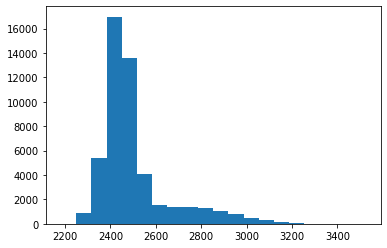

In [9]:
plt.hist(df.T_0, bins=20)

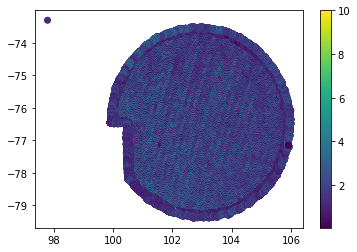

In [10]:
plt.scatter(df.x_pos, df.y_pos, c=df.E_0, vmax=10)
plt.colorbar()

In [11]:
df[['x_pos', 'y_pos']]

,x_pos,y_pos
0,97.797553,-73.305715
1,100.203477,-75.107056
2,100.211309,-75.109707
3,100.218030,-75.114616
4,100.224126,-75.118654
...,...,...
49395,105.907017,-77.161475
49396,105.907037,-77.156768
49397,105.910931,-77.152736
49398,105.914989,-77.152125


# load centroids

In [12]:
pth = './layer8/weighted_centroids_diode_aligned.npy'
d = np.load(pth, allow_pickle=True).item()

In [13]:
d.keys()

dict_keys(['laserdata', 'c1_c2_centroid', 'c1_c2_max', 'c1_c2_area', 'c1_bb_xywh', 'c2_bb_xywh', 'thresholds_c1_c2', 'filter_result', 'time', 'x_pos', 'y_pos', 'diode'])

In [90]:
centroid = d['c1_c2_centroid']
centroid = np.nan_to_num(centroid[:49400,:])
print(centroid[0])

[144.0428333  110.05752469 130.25450313  89.75613252]


# Load single image and plot centroid

In [20]:
!pip install hdf5storage

In [40]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import hdf5storage
from pprint import pprint
from scipy.io import loadmat
from scipy.io import savemat

In [123]:
pth = './layer8/rawdataALLFRAMES.mat'

#this is just for element 1000 for now
idx = 3

with h5py.File(pth, 'r') as h:
    print(h.keys())
    c1 = h['cam1'][idx][:] #camera 1
    c2 = np.fliplr(h['cam2'][idx][:]) #camera 2

<KeysViewHDF5 ['#refs#', 'cam1', 'cam2', 'end_frame', 'imagedata', 'laserdata']>


In [124]:
def delta(center_x, center_y, idx):
    delta_x1 = center_x - round(centroid[idx, 0])
    delta_y1 = center_y - round(centroid[idx, 1])
    delta_x2 = center_x - round(centroid[idx, 2])
    delta_y2 = center_y - round(centroid[idx, 3])
    return delta_x1, delta_y1, delta_x2, delta_y2

def transform(delta_x, delta_y, img):
    
    #translate vertical
    if delta_y == 0:
        img_new = img.copy()
    else:
        '''
        if delta_y > 0: #translate up
            delta_y = -delta_y
        '''
        temp = img[:-delta_y]
        img_new = img.copy()
        img_new[:delta_y] = img[-delta_y:]
        img_new[delta_y:] = temp
    
    #translate horizontal
    if delta_x == 0:
        img_new = img_new.copy()
    else:
        '''
        if delta_x > 0: 
            delta_x = -delta_x
            '''
        temp = img_new[:,-delta_x:]
        img_new[:,delta_x:] = img_new[:,:-delta_x]
        img_new[:,:delta_x] = temp
    
    return img_new

15
-14
29
6


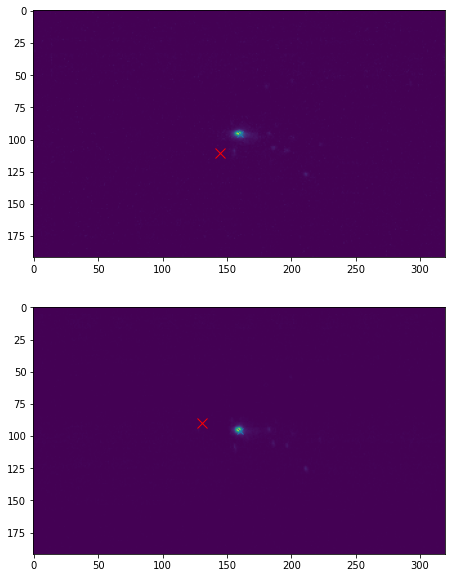

In [110]:
f, ax = plt.subplots(2,1,figsize=(10,10))
ax[0].imshow(c1)
ax[1].imshow(c2)

ax[0].plot(d['c1_c2_centroid'][idx, 0], d['c1_c2_centroid'][idx, 1], 'rx', ms=10)
ax[1].plot(d['c1_c2_centroid'][idx, 2], d['c1_c2_centroid'][idx, 3], 'rx', ms=10)

#Mark the center of the image
center_x = 160
center_y = 96
ax[0].plot(center_x, center_y, marker = 'x')
ax[1].plot(center_x, center_y, marker = 'x')

delta_x1, delta_y1, delta_x2, delta_y2 = delta(center_x, center_y, idx)
print(delta_x1)
print(delta_y1)
print(delta_x2)
print(delta_y2)
img_new1 = transform(delta_x1, delta_y1, c1)
img_new2 = transform(delta_x2, delta_y2, c2)

ax[0].imshow(img_new1)
ax[1].imshow(img_new2)

(192, 320)
(192, 320)
(192, 320)
(192, 320)
(192, 320)
array([[[0.        , 0.        , 0.        , ..., 0.25      ,
         0.        , 1.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.83333333],
        [6.        , 0.        , 0.        , ..., 0.        ,
         0.        , 2.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.85714286, ..., 0.        ,
         1.25      , 0.57142857],
        [0.5       , 0.        , 0.25      , ..., 1.        ,
         1.        , 0.        ]],

       [[0.        , 0.        , 5.        , ..., 0.        ,
         0.        , 0.44444444],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.35714286, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 5.        , ..., 4. 

<ipython-input-122-13b6f1db0be4>:65: RuntimeWarning: divide by zero encountered in divide
  intensity = np.divide(img_new1, img_new2)
<ipython-input-122-13b6f1db0be4>:65: RuntimeWarning: invalid value encountered in divide
  intensity = np.divide(img_new1, img_new2)


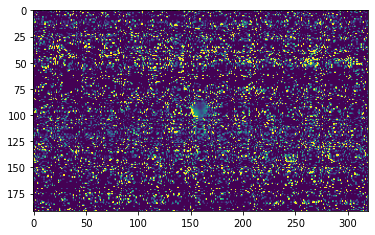

In [122]:
#Mark the center of the image
center_x = 160
center_y = 96

#Calculate discrepency between center of image and laser point
def delta(center_x, center_y, idx):
    delta_x1 = center_x - round(centroid[idx, 0])
    delta_y1 = center_y - round(centroid[idx, 1])
    delta_x2 = center_x - round(centroid[idx, 2])
    delta_y2 = center_y - round(centroid[idx, 3])
    return delta_x1, delta_y1, delta_x2, delta_y2

def transform(delta_x, delta_y, img):
    
    #translate vertical
    if delta_y == 0:
        img_new = img.copy()
    else:
        '''
        if delta_y > 0: #translate up
            delta_y = -delta_y
        '''
        temp = img[:-delta_y]
        img_new = img.copy()
        img_new[:delta_y] = img[-delta_y:]
        img_new[delta_y:] = temp
    
    #translate horizontal
    if delta_x == 0:
        img_new = img_new.copy()
    else:
        '''
        if delta_x > 0: 
            delta_x = -delta_x
            '''
        temp = img_new[:,-delta_x:]
        img_new[:,delta_x:] = img_new[:,:-delta_x]
        img_new[:,:delta_x] = temp
    
    return img_new

#Align images, calculate intensity ratio and save to .mat file
intensity_array = []
for idx in range(0, 5):
    with h5py.File(pth, 'r') as h:
        #print(h.keys())
        c1 = h['cam1'][idx][:] #camera 1
        c2 = np.fliplr(h['cam2'][idx][:]) #camera 2
    
    #Check if the image pixels are correct
    if c1.shape and c2.shape != (192, 320):
        continue
    
    #Check if there are values for the laser position
    if np.all(centroid[idx]) == False:
        continue
        
    delta_x1, delta_y1, delta_x2, delta_y2 = delta(center_x, center_y, idx)
    img_new1 = transform(delta_x1, delta_y1, c1)
    img_new2 = transform(delta_x2, delta_y2, c2)
    
    #ax[0].imshow(img_new1)
    #ax[1].imshow(img_new2)

    intensity = np.divide(img_new1, img_new2)
    #intensity = np.nan_to_num(intensity)
    intensity[np.isnan(intensity)] = 0
    intensity[np.isinf(intensity)] = 0
    intensity_array.append(intensity)
    print(intensity.shape)
    #print(intensity.max())

aligned = {"intensity_ratio": np.array(intensity_array)}

'''
#Save the matlab file as hdf5 format
hdf5storage.savemat('Intensity Ratio1.mat', aligned, format='7.3')

#load the intensity ratio and plot
with h5py.File('Intensity Ratio1.mat', 'r') as f:
    print(f.keys())
    IR = f['intensity_ratio']
    print(IR.shape)
    IR = np.transpose(IR, (2, 1, 0))
    print(IR.shape)

plt.imshow(IR[3], vmax=3)
'''
#Save as all the intensity matrix as matlab file
sio.savemat('Intensity Ratio.mat', aligned)

data = sio.loadmat('Intensity Ratio.mat')
pprint(data['intensity_ratio'])
#print(data.shape)
plt.imshow(data['intensity_ratio'][3], vmax=3)


# load multiple images without using too much memory

In [36]:
# load images
idx_0 = 1000
idx_1 = idx_0 + 100

h = h5py.File(pth, 'r')
c1 = h['cam1'][idx_0:idx_1][:]
c2 = np.flip(h['cam2'][idx_0:idx_1][:], axis=2)


<KeysViewHDF5 ['#refs#', 'cam1', 'cam2', 'end_frame', 'imagedata', 'laserdata']>


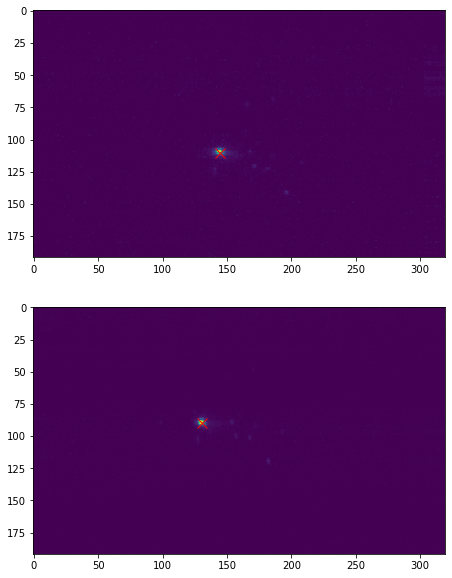

In [37]:
# do some stuff
f, ax = plt.subplots(2,1,figsize=(10,10))
ax[0].imshow(c1[0])
ax[1].imshow(c2[0])

ax[0].plot(d['c1_c2_centroid'][idx_0, 0], d['c1_c2_centroid'][idx_0, 1], 'rx', ms=10)
ax[1].plot(d['c1_c2_centroid'][idx_0, 2], d['c1_c2_centroid'][idx_0, 3], 'rx', ms=10)

In [38]:
# close file
h.close()